In [12]:

# from utils import plot_network, plot_matrix

import networkx as nx
import math
from scipy.sparse import *
import scipy.sparse.linalg as ls
import scipy.sparse.csgraph as csgraph
import nxmetis
import scipy
import numpy as np
from bbd_matrix import bbd_matrix, block_vector
from lib_numba import *
from partitionutil import *
import pickle
import xlrd
import pandas as pd
from functools import reduce
import plotly.graph_objects as go

import time

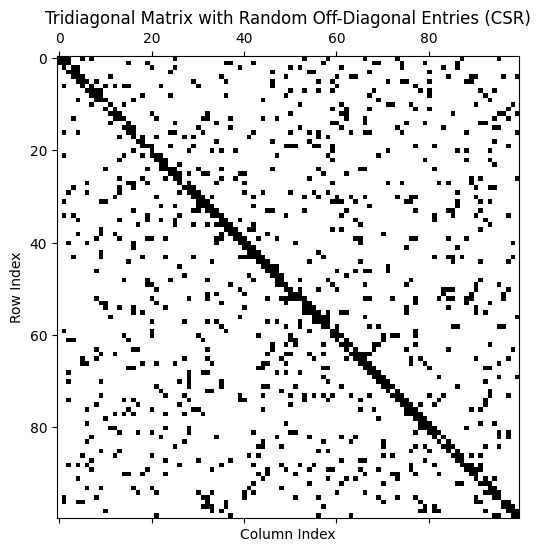

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

def random_tridiagonal_matrix(size, min_value=0, max_value=10):
    # Generate random values for the tridiagonal matrix
    main_diag = np.random.randint(min_value, max_value, size=size)
    lower_diag = np.random.randint(min_value, max_value, size=size-1)
    upper_diag = np.random.randint(min_value, max_value, size=size-1)

    # Create the tridiagonal matrix
    matrix = np.diag(main_diag) + np.diag(lower_diag, k=-1) + np.diag(upper_diag, k=1)

    # Add random off-diagonal entries
    num_off_diagonal_entries = int(0.1 * size * (size - 1))  # 20% of the total possible off-diagonal entries
    off_diag_indices = np.random.choice(size * (size - 1), size=num_off_diagonal_entries, replace=False)
    
    for idx in off_diag_indices:
        row_idx = idx // (size - 1)
        col_idx = idx % (size - 1) + 1
        matrix[row_idx, col_idx] = np.random.randint(min_value, max_value)

    return matrix

# Generate a random tridiagonal matrix of size 5x5
size = 100
tridiag_matrix = random_tridiagonal_matrix(size)

# Convert the tridiagonal matrix to CSR format
csr_tridiag_matrix = csr_matrix(tridiag_matrix)

# Plot the CSR tridiagonal matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.spy(csr_tridiag_matrix.toarray())
plt.title('Tridiagonal Matrix with Random Off-Diagonal Entries (CSR)')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

In [ ]:
# Generating a random BBD Matrix

import numpy as np

def random_bordered_block_diagonal_matrix(block_sizes, border_size, min_value=1, max_value=10):
    num_blocks = len(block_sizes)
    total_size = sum(block_sizes) + num_blocks - 4 

    matrix = np.zeros((total_size, total_size))

    current_row = 0
    current_col = 0

    for i, block_size in enumerate(block_sizes):
        # Fill the diagonal block
        matrix[current_row:current_row+block_size, current_col:current_col+block_size] = np.random.randint(min_value, max_value, size=(block_size, block_size))
            
        # Move to the next block position
        current_row += block_size 
        current_col += block_size 

  
    #matrix[-3,:] = np.random.randint(min_value, max_value, size = (1, total_size))
    #matrix[-2,:] = np.random.randint(min_value, max_value, size = (1, total_size))
    matrix[-1,:] = np.random.randint(min_value, max_value, size = (1, total_size))
    #matrix[-4,:] = np.random.randint(min_value, max_value, size = (1, total_size))
    matrix[:,-1] = np.random.randint(min_value, max_value, size = (1, total_size))
    #matrix[:,-2] = np.random.randint(min_value, max_value, size = (1, total_size))
    #matrix[:,-3] = np.random.randint(min_value, max_value, size = (1, total_size))
    #matrix[:,-4] = np.random.randint(min_value, max_value, size = (1, total_size))
    # num_entries = int(0.1*(total_size **2))
    # indices = np.random.choice(total_size **2, size = num_entries, replace = False)
    # row_indices = indices // total_size
    # col_indices = indices % total_size
    # matrix[row_indices, col_indices] = np.random.randint(min_value, max_value, size = num_entries)
    
    return matrix

# Example usage:
block_sizes = [4, 2, 3, 4, 4]  # Sizes of diagonal blocks
border_size = 0
matrix = scipy.sparse.csr_matrix(random_bordered_block_diagonal_matrix(block_sizes, border_size))
matrix2 = random_bordered_block_diagonal_matrix(block_sizes, border_size)
print(matrix)


# Permute the matrix

def pm(matrix):
    
    pmm = np.random.permutation(matrix)

    return pmm

pmm = pm(matrix2)
print(pmm)
pm = scipy.sparse.csr_matrix(pmm)


import matplotlib.pyplot as plt # Visualizing it
plt.figure(figsize = (8,6))
plt.spy(matrix, markersize = 5)
plt.title('Random BBD Matrix')
plt.xlabel('Col Index')
plt.ylabel('Row Index')
plt.show()



# import matplotlib.pyplot as plt # Visualizing it
# plt.figure(figsize = (8,6))
# plt.spy(pmm, markersize = 5)
# plt.title('Permuted Random Matrix')
# plt.xlabel('Col Index')
# plt.ylabel('Row Index')
# plt.show()

from scipy.sparse import random
from scipy.sparse import csr_matrix




G = nx.Graph(matrix)

# Obtain the adjacency matrix of the graph
adj_matrix = nx.adjacency_matrix(G)

# # Convert the adjacency matrix to a dense matrix
dense_adj_matrix = adj_matrix.todense()

# Check if the adjacency matrix is symmetric
is_symmetric = np.array_equal(dense_adj_matrix, dense_adj_matrix.T)

if is_symmetric:
    print("The adjacency matrix is symmetric.")
else:
    print("The adjacency matrix is not symmetric.")





In [ ]:
BBD_B = admittance_to_BBD(matrix,1)

In [ ]:
from scipy.sparse import bsr_matrix, save_npz, csr_matrix

J_csr = scipy.sparse.load_npz('csr_wecc.npz')
A = J_csr
G = nx.Graph(A)
nx.draw(G)
BBD_A = admittance_to_BBD(A,30)

In [ ]:
from scipy.sparse import random
def sm(n, density = 0.1):
    smatrix = random(n,n, density = density, format = 'csr')
    return smatrix

sm = sm(15) # A random csr sparse matrix with 15 nodes
G = nx.Graph(sm)
nx.draw(G)
# e, p = nxmetis.partition(G, 4, recursive = True, options = nxmetis.MetisOptions(rpart=0,niter=1))
BBD = admittance_to_BBD(sm, num_parts=2)

In [ ]:
import matplotlib.pyplot as plt # Visualizing it
plt.figure(figsize = (8,6))
plt.spy(sm, markersize = 5)
plt.title('Random BBD Matrix')
plt.xlabel('Col Index')
plt.ylabel('Row Index')
plt.show()

In [ ]:
from scipy.sparse import random
from scipy.sparse import csr_matrix




G = nx.Graph(sm)

# Obtain the adjacency matrix of the graph
adj_matrix = nx.adjacency_matrix(G)

# # Convert the adjacency matrix to a dense matrix
dense_adj_matrix = adj_matrix.todense()

# Check if the adjacency matrix is symmetric
is_symmetric = np.array_equal(dense_adj_matrix, dense_adj_matrix.T)

if is_symmetric:
    print("The adjacency matrix is symmetric.")
else:
    print("The adjacency matrix is not symmetric.")

In [ ]:

array = BBD_A[0].to_dense()

import matplotlib.pyplot as plt # Visualizing it
plt.figure(figsize = (8,6))
plt.spy(array, markersize = 5)
plt.title('BBD Matrix')
plt.xlabel('Col Index')
plt.ylabel('Row Index')
plt.show()


In [ ]:
a = BBD_A[0]
for n, g in a.items():
    plt.figure()
    nx.draw(g, with_labels = True)
    plt.title(n)
    plt.show()

In [ ]:
from scipy.sparse import bsr_matrix, save_npz, csr_matrix

J_csr = scipy.sparse.load_npz('csr_matrix300.npz')
A = csr_tridiag_matrix
G = nx.Graph(A)
# nx.draw(G)
BBD_A2 = admittance_to_BBD(A,2)


array = BBD_A2[0].to_dense()

import matplotlib.pyplot as plt # Visualizing it
plt.figure(figsize = (8,6))
plt.spy(array, markersize = 5)
plt.title('BBD Matrix')
plt.xlabel('Col Index')
plt.ylabel('Row Index')
plt.show()



In [ ]:
# Generating a random BBD Matrix

import numpy as np

def random_bordered_block_diagonal_matrix(block_sizes, border_size, min_value=1, max_value=10):
    num_blocks = len(block_sizes)
    total_size = sum(block_sizes) + border_size*(num_blocks - 1)

    matrix = np.zeros((total_size, total_size))

    current_row = 0
    current_col = 0

    for i, block_size in enumerate(block_sizes):
        # Fill the diagonal block
        matrix[current_row:current_row+block_size, current_col:current_col+block_size] = np.random.randint(min_value, max_value, size=(block_size, block_size))
            
        # Move to the next block position
        current_row += block_size + border_size
        current_col += block_size + border_size

  
    
    rows, cols = matrix.shape
    row = np.random.randint(min_value, max_value, size=(1, cols))
    matrix = np.vstack((matrix, row))

    
    return matrix

# Example usage:
block_sizes = [3, 2, 4]  # Sizes of diagonal blocks
border_size = 0
matrix = random_bordered_block_diagonal_matrix(block_sizes, border_size)
print(matrix)


# Permute the matrix

def pm(matrix):
    
    pmm = np.random.permutation(matrix)

    return pmm

pmm = pm(matrix)
print(pmm)



import matplotlib.pyplot as plt # Visualizing it
plt.figure(figsize = (8,6))
plt.spy(matrix, markersize = 5)
plt.title('Random BBD Matrix')
plt.xlabel('Col Index')
plt.ylabel('Row Index')
plt.show()



import matplotlib.pyplot as plt # Visualizing it
plt.figure(figsize = (8,6))
plt.spy(pmm, markersize = 5)
plt.title('Permuted Random Matrix')
plt.xlabel('Col Index')
plt.ylabel('Row Index')
plt.show()






In [10]:
# Test with BBD Matrix code
J_csr = scipy.sparse.load_npz('csr_wecc.npz')
# sm = scipy.sparse.csr_matrix(sm)
A = J_csr
# csr_pmm = csr_matrix(matrix)
final_BBD = admittance_to_BBD(A, 10)


    Graph:          2.56e-02   30.65%
    NxMetis:        3.08e-03    3.69%
    OutN:           3.58e-06    0.00%
    PartE:          2.85e-02   34.08%
    ComE:           1.31e-02   15.64%
    ComN:           2.05e-05    0.02%
    PartN:          5.34e-05    0.06%
    AllGr:          2.14e-03    2.56%
    IdxOrd:         6.18e-03    7.40%
    CrnOrd:         4.82e-04    0.58%
    Final:          3.54e-04    0.42%
    BlkSort:        1.95e-03    2.33%
    BBD:            2.14e-03    2.56%
    Total:          8.35e-02
    

        Partition Size:      10
        Total NNZ:         1892
        Min Block Size:      22
        Min Block NNZ:       83
        Max Block Size:      37
        Max Block NNZ:      191
        Corner Size:        106
        Corner NNZ:         556
        


In [ ]:
datatype = csr_pmm.dtype

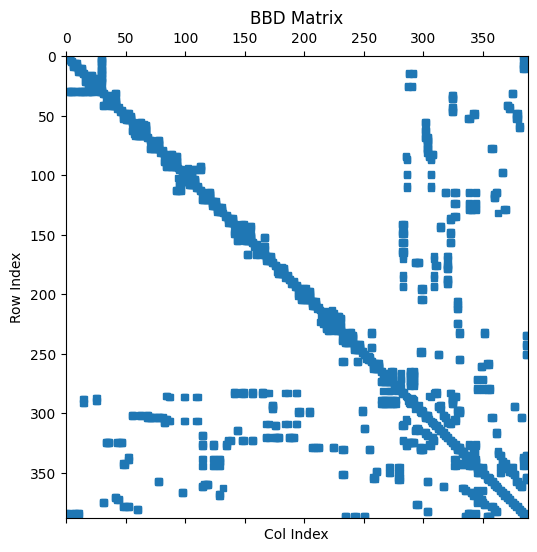

In [11]:
# Visualize the output

array = final_BBD[0].to_dense()

import matplotlib.pyplot as plt 
plt.figure(figsize = (8,6))
plt.spy(array, markersize = 5)
plt.title('BBD Matrix')
plt.xlabel('Col Index')
plt.ylabel('Row Index')
plt.show()

In [9]:
csr_wecc_result = scipy.sparse.csr_matrix(array)
scipy.sparse.save_npz('csr_wecc_result.npz', csr_wecc_result)